<a href="https://colab.research.google.com/github/Manveen07/neuralnetwork-from-scratch-and-backtracking/blob/main/neuralnetworkday1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class Value:
  def __init__(self,data,_children=(),_op="",label=''):
    self.data=data
    self._prev=set(_children)
    self.grad=0
    self._op=_op
    self._backward=lambda:None
    self.label=label
  def __repr__(self):
    return f"value {self.label}(data={self.data})"
  def __truediv__(self,other):
    return self*other**-1
  def __neg__(self):
    return self*-1
  def __sub__(self,other):
    return self+(-other)
  def __add__(self,other):
    other = other if isinstance(other, Value) else Value(other)
    out=Value(self.data+other.data,(self,other),"+")
    def _backward():
      self.grad+=1.0*out.grad
      other.grad+=1.0*out.grad
    out._backward=_backward
    return out
  def __mul__(self,other):
    other = other if isinstance(other, Value) else Value(other)
    out=Value(self.data*other.data,(self,other),"*")
    def _backward():
      self.grad+=other.data*out.grad
      other.grad+=self.data*out.grad
    out._backward=_backward
    return out
  def __pow__(self,other):
    assert isinstance(other,(int,float))
    out=Value(self.data**other,(self,),f"**{other}")
    def _backward():
      self.grad+=other*(self.data**(other-1))*out.grad
    out._backward=_backward
    return out

  def tanh(self):
    n=self.data
    t=(math.exp(2*n)-1)/(math.exp(2*n)+1)
    out=Value(t,(self,),"tanh")
    def _backward():
      self.grad+=(1-t**2)*out.grad
    out._backward=_backward
    return out
  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()
  def exp(self):
    x=self.data
    out=Value(math.exp(x),(self,),"exp")
    def _backward():
      self.grad+=out.data*out.grad
    out._backward=_backward
    return out
  def __rmul__(self, other): # other * self
    return self * other
  def __radd__(self, other): # other + self
    return self + other



In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [ ]:
a=Value(2.0,label="a")
b=Value(-3.0,label="b")
c=Value(10,label="c")
e=a*b;e.label="e"
d=e+c;d.label="d"
f=Value(-2.0,label="f")
L=d*f;L.label="L"

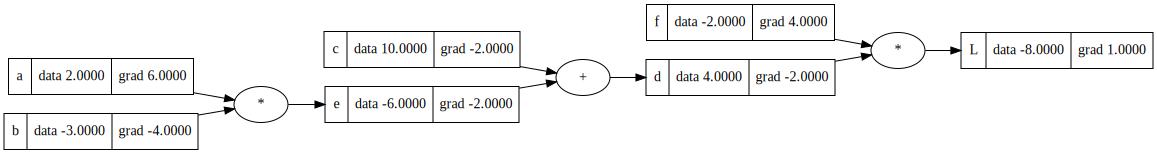

In [ ]:
draw_dot(L)

In [ ]:
L.backward()

In [ ]:
a.data+=0.01*a.grad
b.data+=0.01*b.grad
c.data+=0.01*c.grad
f.data+=0.01*f.grad
e=a*b
d=e+c
L=d*f
print(L.data)

-7.286496


In [ ]:
def lol():

  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 , label='a')
  b = Value(-3.0+h, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'

  f = Value(-2.0, label='f')
  L = d* f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)
lol()

-3.9999999999995595


In [ ]:
#dl/dc=dd/dc*dL/dd chain rule
d=e+c
#dd/dc=1
#dd/de=1
l=d*f
#dl/dd=f
#dl/df=d

In [ ]:
f.grad=4.0
d.grad=-2.0

In [ ]:
L.grad=1.0

In [ ]:
c.grad=-2.0
e.grad=-2.0

In [ ]:
#dL/de=-2.0
#dL/da=dL/de*de/da
#e=a*b
#de/da=b=-3
a.grad=6
#de/db=a=2
#dl/db=-2.0*2
b.grad=-4.0

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
e=(2*n).exp();e.label='e'
o = (e-1)/(e+1); o.label='o'
o.backward()
#o = n.tanh(); o.label = 'o'

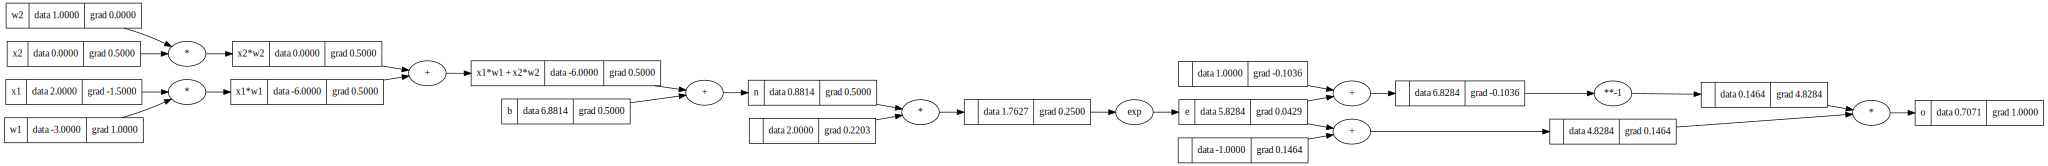

In [ ]:
draw_dot(o)

In [ ]:
#o.grad=1.0
o.backward()


In [ ]:
n._backward()

In [ ]:
x1w1x2w2._backward()

In [ ]:
x1w1._backward()
x2w2._backward()

In [ ]:
x2.grad=0.5
x1.grad=-1.5
w1.grad=0.5*2.0

In [ ]:
o.grad=1.0
n.grad=0.5
x1w1x2w2.grad=0.5
b.grad=0.5
x1w1.grad=0.5
x2w2.grad=0.5



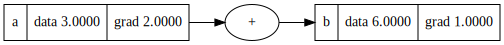

In [ ]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

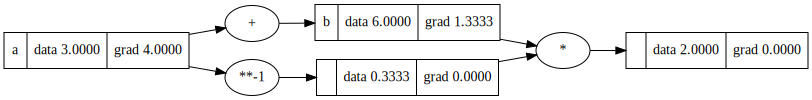

In [ ]:
c=b/a
draw_dot(c)
#c.backward()

In [ ]:
import torch


In [ ]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [ ]:
class Neuron:
  def __init__(self,nin):
    self.w=[Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b=Value(random.uniform(-1,1))
  def __call__(self,x):
    act=sum((wi*xi for wi,xi in zip(self.w,x)),self.b)
    out=act.tanh()
    return out
  def parameters(self):
    return self.w+[self.b]
class Layer:
  def __init__(self,nin,nout):
    self.neurons=[Neuron(nin) for _ in range(nout)]

  def __call__(self,x):
    outs=[n(x) for n in self.neurons]
    return outs[0] if len(outs)==1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  def __init__(self,nin,nouts):
    sz=[nin]+nouts
    self.layers=[Layer(sz[i],sz[i+1]) for i in range(len(nouts))]

  def __call__(self,x):
    for layer in self.layers:
      x=layer(x)
    return x
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [ ]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

value (data=0.8618641243986558)

In [ ]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [ ]:
ypred=[n(x) for x in xs]
ypred

[value (data=0.8618641243986558),
 value (data=0.2540774940746274),
 value (data=0.8868787050316919),
 value (data=0.8269419905047243)]

In [ ]:
loss=sum((yout-ygt)**2 for ygt,yout in  zip(ys,ypred))
loss

value (data=5.182052203425189)

In [ ]:
for p in n.parameters():
  p.data += -0.01*p.grad


In [ ]:
for k in range(20):
  #forward pass
  ypred=[n(x) for x in xs]
  loss=sum((yout-ygt)**2 for ygt,yout in  zip(ys,ypred))

  #reset and backward pass
  for p in n.parameters():
    p.grad=0
  loss.backward()

  #update
  for p in n.parameters():
    p.data += -0.1*p.grad
  print(f'Epoch {k+1}, Loss: {loss.data}')

Epoch 1, Loss: 0.02009117293351904
Epoch 2, Loss: 0.018561953007945692
Epoch 3, Loss: 0.017239067264533284
Epoch 4, Loss: 0.016084402924408644
Epoch 5, Loss: 0.015068554294550476
Epoch 6, Loss: 0.014168493102995984
Epoch 7, Loss: 0.013365944453945022
Epoch 8, Loss: 0.012646231992377447
Epoch 9, Loss: 0.011997442037043626
Epoch 10, Loss: 0.011409808864997817
Epoch 11, Loss: 0.010875256072251732
Epoch 12, Loss: 0.01038704986754337
Epoch 13, Loss: 0.00993953382349397
Epoch 14, Loss: 0.009527923704930934
Epoch 15, Loss: 0.00914814715327861
Epoch 16, Loss: 0.008796717243552713
Epoch 17, Loss: 0.008470631889079717
Epoch 18, Loss: 0.008167293162757739
Epoch 19, Loss: 0.007884442103976578
Epoch 20, Loss: 0.007620105667979636


In [ ]:
ypred=[n(x) for x in xs]
ypred

[value (data=0.9302265261719646),
 value (data=-0.9770304318998375),
 value (data=-0.8882369611878819),
 value (data=0.9368331657152182)]